In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

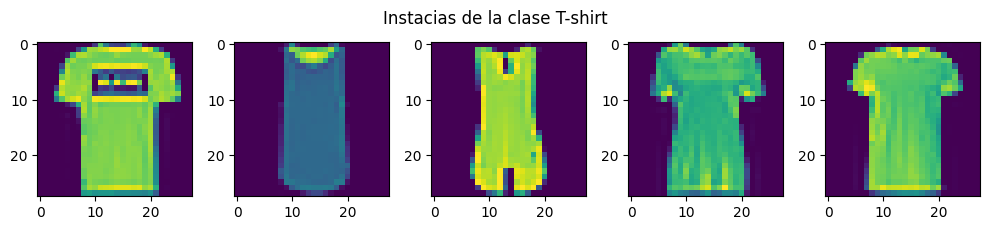

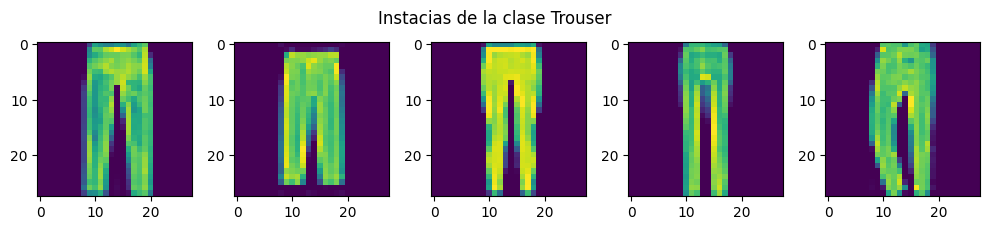

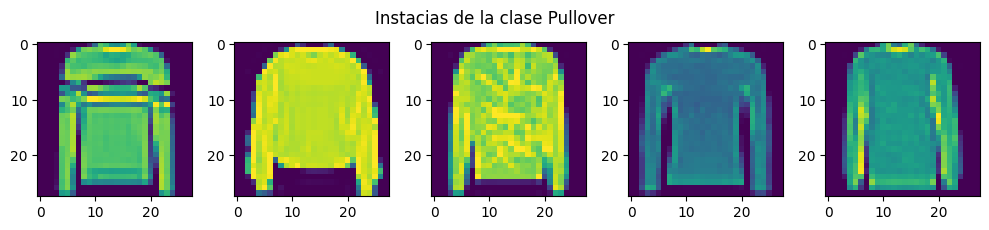

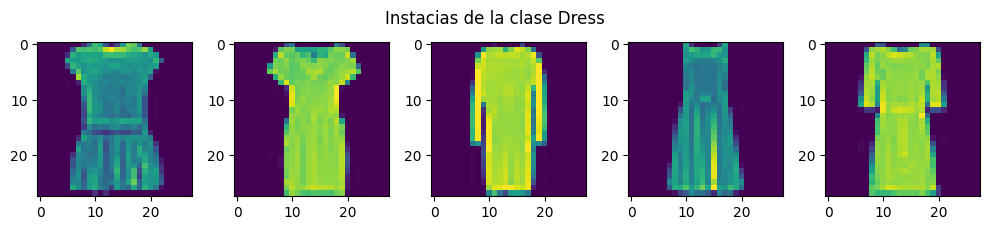

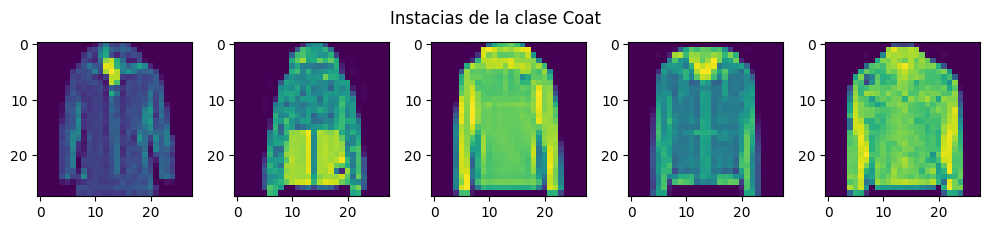

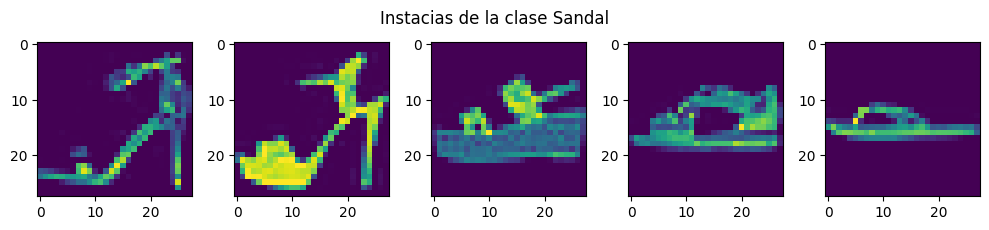

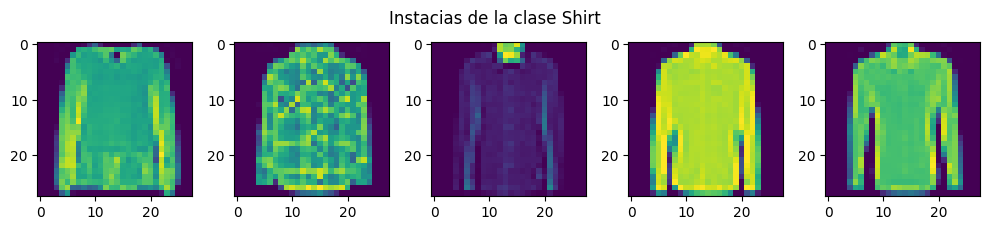

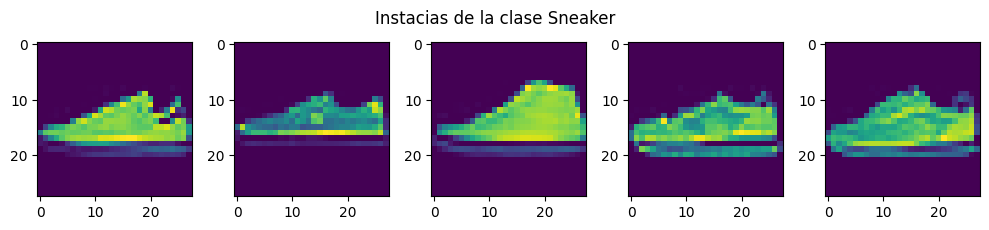

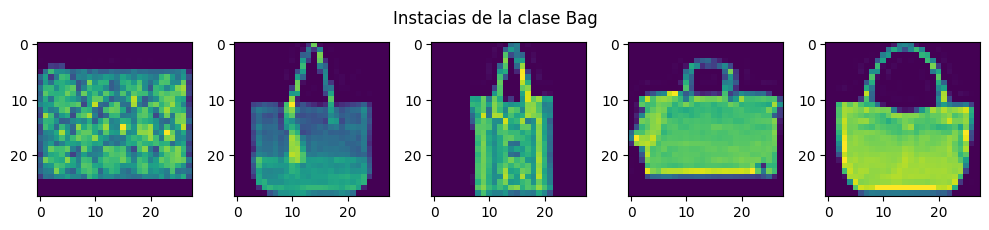

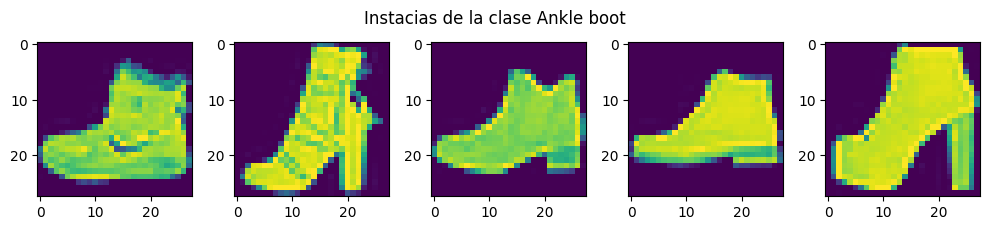

In [2]:
data = np.load('Data/train_images.npy')
labels = pd.read_csv('Data/train_labels.csv')

clases = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 2.3))
    for j in range(5): 
        ax[j].imshow(data[labels.label.values == i,...][j])

    fig.tight_layout()

    fig.suptitle('Instacias de la clase ' + clases[i])
    plt.show()

    

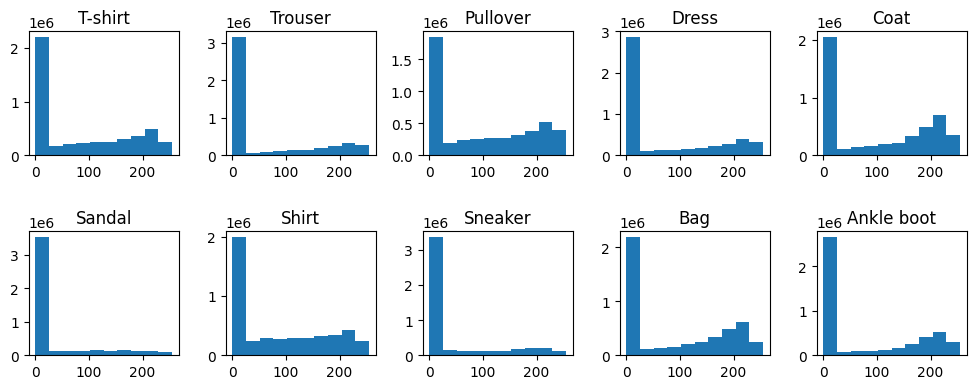

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i in range(5):
    ax[0, i].hist(data[labels.label.values == i,...].flatten())
    ax[0, i].set_title(clases[i])
    
for i in range(5):
    ax[1, i].hist(data[labels.label.values == (i+5),...].flatten())
    ax[1, i].set_title(clases[i+5])

fig.tight_layout()

plt.show()

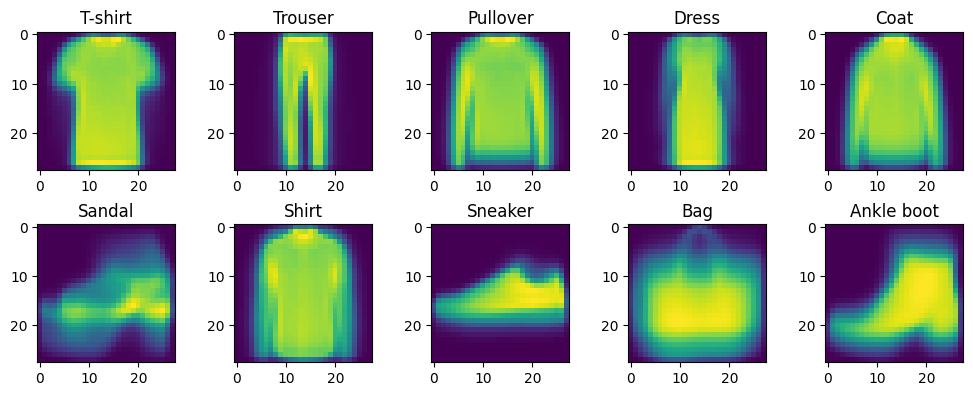

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i in range(5):
    ax[0, i].imshow(data[labels.label.values == i,...].mean(axis = 0))
    ax[0, i].set_title(clases[i])
    
for i in range(5):
    ax[1, i].imshow(data[labels.label.values == (i+5),...].mean(axis = 0))
    ax[1, i].set_title(clases[i+5])

fig.tight_layout()

plt.show()

In [5]:
labelsNp = np.array([int(i[0]) for i in labels.values.tolist() if i[0] != 'label'])
labelsNp

array([9, 0, 0, ..., 3, 0, 5])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
trainX, testX, trainY, testY = train_test_split(data, labelsNp, test_size=0.25, random_state=42)

sparseTrainY = np.zeros([len(trainY), 10])
for idx in range(len(trainY)):
    sparseTrainY[idx, trainY[idx]] = 1

sparseTestY = np.zeros([len(testY), 10])
for idx in range(len(testY)):
    sparseTestY[idx, testY[idx]] = 1
    
trainX = trainX.astype(np.float32)/255
testX = testX.astype(np.float32)/255

In [8]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, Nadam, Adamax, Adagrad
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.initializers import Constant, GlorotNormal, GlorotUniform, Zeros, RandomNormal, glorot_uniform, zeros, random_normal, constant
from tensorflow.keras.callbacks import EarlyStopping
from tensorflowaddons

In [137]:
softmax = Sequential()

softmax.add(Flatten(input_shape=(28, 28)))
softmax.add(Dense(10, activation='softmax'))

softmax.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
softmax.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy", Precision(), Recall()])
history = softmax.fit(x = trainX, y = sparseTrainY, validation_data = (testX, sparseTestY), epochs = 20, batch_size = 128)
name = 'base1'

Epoch 1/20
352/352 [==============================] - 3s 5ms/step - loss: 48.9402 - accuracy: 0.7445 - precision: 0.7445 - recall: 0.7445 - val_loss: 37.7295 - val_accuracy: 0.7635 - val_precision: 0.7635 - val_recall: 0.7635
Epoch 2/20
352/352 [==============================] - 1s 4ms/step - loss: 31.5575 - accuracy: 0.7850 - precision: 0.7850 - recall: 0.7850 - val_loss: 23.9971 - val_accuracy: 0.8105 - val_precision: 0.8105 - val_recall: 0.8105
Epoch 3/20
352/352 [==============================] - 1s 4ms/step - loss: 34.1886 - accuracy: 0.7928 - precision: 0.7928 - recall: 0.7928 - val_loss: 32.0263 - val_accuracy: 0.7963 - val_precision: 0.7963 - val_recall: 0.7962
Epoch 4/20
352/352 [==============================] - 1s 4ms/step - loss: 36.2432 - accuracy: 0.7934 - precision: 0.7935 - recall: 0.7934 - val_loss: 30.5239 - val_accuracy: 0.8129 - val_precision: 0.8130 - val_recall: 0.8129
Epoch 5/20
352/352 [==============================] - 1s 4ms/step - loss: 34.7618 - accuracy: 0.

In [11]:
predict = softmax.predict(testX)
argmaxPredict = np.argmax(predict, axis=1)
f1Macro = f1_score(testY, argmaxPredict, average='macro')
f1Macro

469/469 [==============================] - 1s 2ms/step


0.7490577357570177

In [12]:
areaROC = roc_auc_score(testY, predict, multi_class='ovr', average='macro')
areaROC

0.8985385004527267

In [23]:
from sklearn.preprocessing import LabelBinarizer

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

label_binarizer = LabelBinarizer().fit(trainY)
y_onehot_test = label_binarizer.transform(testY)
n_classes = 10

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

#print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

plt.plot(
    fpr["macro"],
    tpr["macro"],
    color='navy',
    linestyle=':'
)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.grid()


path = 'Modelos/Softmax/'


plt.savefig(path + name +'.pdf')
plt.show()


NameError: name 'predict' is not defined

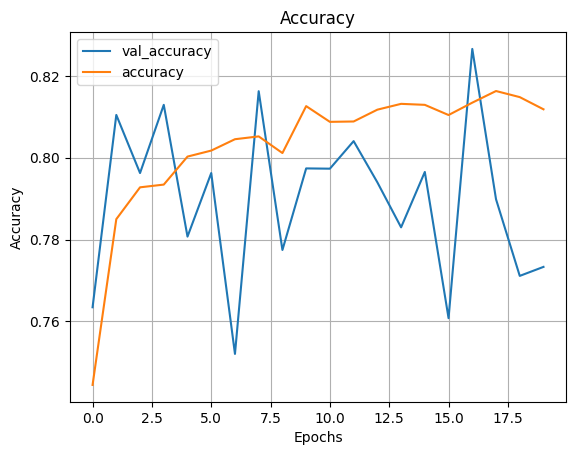

In [14]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.grid()
plt.legend()
plt.savefig(path + name +'acc.pdf')
plt.show()

In [24]:
from contextlib import redirect_stdout
import json


with open(path + name + '.txt', 'w') as f:
    with redirect_stdout(f):
        softmax.summary()
    f.write('\n')
    f.write('Loss: ' + softmax.loss)
    f.write('\n\n')
    f.write('Optimizer:\n')
    for key, value in softmax.optimizer.get_config().items(): 
        f.write('%s:%s\n' % (key, value))
    f.write('\n')
    f.write('f1 macro: ')
    f.write(str(f1Macro))
    f.write('\n')
    f.write('auc: ')
    f.write(str(areaROC))
    f.write('\n')
    f.write('acc: ')
    f.write(str(history.history['val_accuracy'][-1]))
    f.write('\n')
    f.write('loss: ')
    f.write(str(history.history['val_loss'][-1]))
    f.write('\n')
    f.write('precision: ')
    f.write(str(history.history['val_precision_1'][-1]))
    f.write('\n')
    f.write('recall: ')
    f.write(str(history.history['val_recall_1'][-1]))


NameError: name 'path' is not defined

In [11]:
from tensorflow.keras.layers import LeakyReLU, Dropout



act = 'relu'

modelMLP = Sequential()
modelMLP.add(Flatten(input_shape=(28, 28)))
modelMLP.add(Dropout(0.3))
modelMLP.add(BatchNormalization(synchronized=True))
modelMLP.add(Dense(1000, activation=act, kernel_initializer=GlorotNormal(seed=1)))#LeakyReLU(alpha=0.05)))#, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001) ))
modelMLP.add(Dropout(0.3))
modelMLP.add(BatchNormalization(synchronized=True))
modelMLP.add(Dense(1000, activation=act, kernel_initializer=GlorotNormal(seed=1)))#LeakyReLU(alpha=0.05)))#, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001) ))
modelMLP.add(Dropout(0.3))
modelMLP.add(BatchNormalization(synchronized=True))
modelMLP.add(Dense(1000, activation=act, kernel_initializer=GlorotNormal(seed=1)))#LeakyReLU(alpha=0.05)))#, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001) ))
modelMLP.add(Dropout(0.3))
modelMLP.add(BatchNormalization(synchronized=True))
#modelMLP.add(Dense(2, activation='linear'))
modelMLP.add(Dense(10, activation='softmax', kernel_initializer=GlorotNormal(seed=1)))#, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
modelMLP.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout_8 (Dropout)         (None, 784)               0         
                                                                 
 batch_normalization_8 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 1000)              785000    
                                                                 
 dropout_9 (Dropout)         (None, 1000)              0         
                                                                 
 batch_normalization_9 (Batc  (None, 1000)             4000      
 hNormalization)                                      

In [12]:
stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

batch = 512
#dropout = 0.3
#dropouts = np.arange(0.1, 0.6, 0.1)
#activaciones = ['tanh', 'relu', 'elu', LeakyReLU(alpha=0.3)]
act = 'relu'

#optimizers = [SGD(learning_rate=0.002), Adagrad(learning_rate=0.002), Adam(learning_rate=0.002), Nadam(learning_rate=0.002), Adamax(learning_rate=0.002)]
#opt = Adamax(learning_rate=0.002)

#inits = [GlorotNormal(seed=1), glorot_uniform(), zeros(), random_normal(mean=0., stddev=1.), constant(3.)]

#lrs = np.arange(0.002, 0.022, 0.002)
'''
for dropout in dropouts:
    #name = act if type(act) == str else 'leaky relu'
    name = str(dropout)
    print(name)
    modelMLP = Sequential()
    modelMLP.add(Flatten(input_shape=(28, 28)))
    modelMLP.add(Dropout(dropout))
    modelMLP.add(BatchNormalization(synchronized=True))
    modelMLP.add(Dense(1000, activation=act))#LeakyReLU(alpha=0.05)))#, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001) ))
    modelMLP.add(Dropout(dropout))
    modelMLP.add(BatchNormalization(synchronized=True))
    modelMLP.add(Dense(1000, activation=act))#LeakyReLU(alpha=0.05)))#, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001) ))
    modelMLP.add(Dropout(dropout))
    modelMLP.add(BatchNormalization(synchronized=True))
    modelMLP.add(Dense(1000, activation=act))#LeakyReLU(alpha=0.05)))#, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001) ))
    modelMLP.add(Dropout(dropout))
    modelMLP.add(BatchNormalization(synchronized=True))
    #modelMLP.add(Dense(2, activation='linear'))
    modelMLP.add(Dense(10, activation='softmax'))#, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001), kernel_initializer=init))
'''
modelMLP.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.2, decay=0.0005), metrics=["accuracy", Precision(), Recall()])

history2 = modelMLP.fit(x = trainX, y = sparseTrainY, validation_data = (testX, sparseTestY), epochs = 160, batch_size = batch, callbacks=[stop], verbose=1)
'''   
    with open('VarHyper2/dropouts.txt', 'a') as f:
        f.write(str(history2.history['val_accuracy'][-1]))
        f.write(', ')
        f.write(str(np.argmax(history2.history['val_accuracy'])))
        f.write(', ')
        f.write(name)
        f.write('\n')
'''

ValueError: decay is deprecated in the new Keras optimizer, pleasecheck the docstring for valid arguments, or use the legacy optimizer, e.g., tf.keras.optimizers.legacy.Adam.

In [233]:
modelMLP.save('Red2')

INFO:tensorflow:Assets written to: Red2\assets


INFO:tensorflow:Assets written to: Red2\assets


In [235]:
name2 = 'glorotNorm'
predict2 = modelMLP.predict(testX)
argmaxPredict2 = np.argmax(predict2, axis=1)
f1Macro2 = f1_score(testY, argmaxPredict2, average='macro')
f1Macro2

469/469 [==============================] - 4s 9ms/step


0.9039133752070413

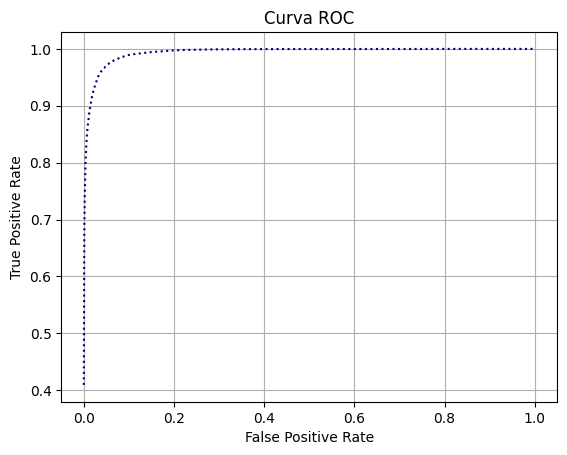

In [236]:
fpr2, tpr2, roc_auc2 = dict(), dict(), dict()

label_binarizer2 = LabelBinarizer().fit(trainY)
y_onehot_test2 = label_binarizer2.transform(testY)
n_classes = 10

for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_onehot_test2[:, i], predict2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

fpr_grid2 = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr2 = np.zeros_like(fpr_grid2)

for i in range(n_classes):
    mean_tpr2 += np.interp(fpr_grid2, fpr2[i], tpr2[i])  # linear interpolation

# Average it and compute AUC
mean_tpr2 /= n_classes

fpr2["macro"] = fpr_grid2
tpr2["macro"] = mean_tpr2
roc_auc2["macro"] = auc(fpr2["macro"], tpr2["macro"])

#print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

plt.plot(
    fpr2["macro"],
    tpr2["macro"],
    color='navy',
    linestyle=':'
)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.grid()


path2 = 'Modelos/MLP/'


plt.savefig(path2 + name2 +'.pdf')
plt.show()

In [237]:
areaROC2 = roc_auc_score(testY, predict2, multi_class='ovr', average='macro')
areaROC2

0.9937907051470882

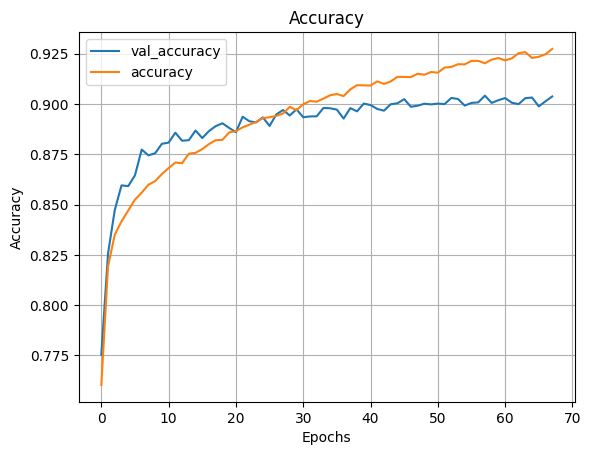

In [238]:
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.plot(history2.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.grid()
plt.legend()
plt.savefig(path2 + name2 +'acc.pdf')
plt.show()

In [239]:
with open(path2 + name2 + '.txt', 'w') as f:
    with redirect_stdout(f):
        modelMLP.summary()
    f.write('\n')
    f.write('Loss: ' + modelMLP.loss)
    f.write('\n\n')
    f.write('Optimizer:\n')
    for key, value in modelMLP.optimizer.get_config().items(): 
        f.write('%s:%s\n' % (key, value))
    f.write('\n')
    f.write('f1 macro: ')
    f.write(str(f1Macro2))
    f.write('\n')
    f.write('auc: ')
    f.write(str(areaROC2))
    f.write('\n')
    f.write('acc: ')
    f.write(str(history2.history['val_accuracy'][-1]))
    f.write('\n')
    f.write('loss: ')
    f.write(str(history2.history['val_loss'][-1]))
    f.write('\n')
    f.write('precision: ')
    f.write(str(history2.history['val_precision_104'][-1]))
    f.write('\n')
    f.write('recall: ')
    f.write(str(history2.history['val_recall_104'][-1]))
    f.write('\n')
    f.write('Activation: ')
    f.write(act)
    f.write('\n')
    f.write('Batch: ')
    f.write(str(batch))



In [234]:
submission = pd.DataFrame()
data = np.load('Data/test_images.npy')/255
submission['id'] = np.arange(len(data))
submission['Category'] = np.argmax(modelMLP.predict(data), (1))
submission.to_csv('submission.csv', index=False)

313/313 [==============================] - 3s 9ms/step


In [90]:

model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(1000, activation='relu'))
model3.add(Dense(1000, activation='relu'))
model3.add(Dense(1000, activation='relu'))
model3.add(Dense(2, activation='linear'))
model3.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_67 (Dense)            (None, 1000)              785000    
                                                                 
 dense_68 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_69 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_70 (Dense)            (None, 2)                 2002      
                                                                 
Total params: 2,789,002
Trainable params: 2,789,002
Non-trainable params: 0
_________________________________________________________________


In [91]:
for i in range(len(model3.layers)):
    model3.layers[i].set_weights(modelMLP.layers[i].get_weights()) 
    


In [92]:
model3.compile(loss="categorical_crossentropy", optimizer=Adamax(learning_rate=0.002), metrics=["accuracy", Precision(), Recall()])

In [93]:
output = model3.predict(data)

1875/1875 [==============================] - 13s 7ms/step


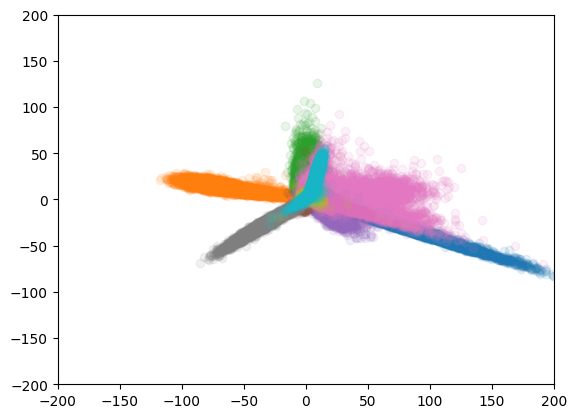

In [133]:
for i in range(10):
    #if i != 4:
    plt.scatter(output[labelsNp==i, 0], output[labelsNp==i, 1], alpha = 0.1)
#plt.scatter(output[labelsNp==4, 0], output[labelsNp==4, 1], alpha = 0.1)
plt.xlim(-200, 200)    
plt.ylim(-200, 200)    
plt.show()

In [95]:
from keras.models import Model
from keras.layers import Input

model4 = Sequential()

model4.add(Input(shape=(2,)))
model4.add(Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 10)                30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [96]:
model4.compile(loss="categorical_crossentropy", optimizer=Adamax(learning_rate=0.002), metrics=["accuracy", Precision(), Recall()])

In [97]:
model4.layers[0].set_weights(modelMLP.layers[-1].get_weights()) 

In [121]:
range_nums = np.arange(-200, 200)

# Create the meshgrid
x, y = np.meshgrid(range_nums, range_nums)

# Combine x and y into a 2D array
combinations = np.column_stack((x.flatten(), y.flatten()))

# Print the shape and the first few rows of the array

In [122]:
output2 = model4.predict(combinations)

5000/5000 [==============================] - 6s 1ms/step


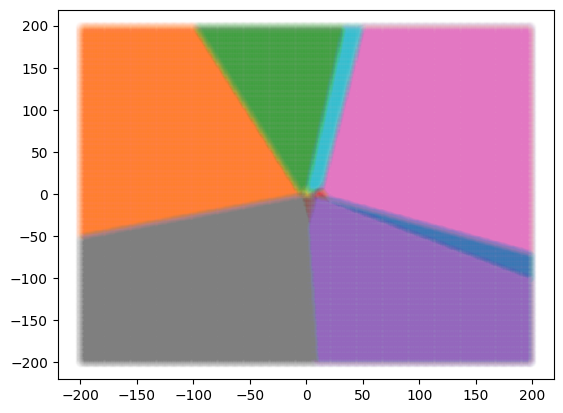

In [135]:
argm = np.zeros(len(output2))

for idx, val in enumerate(output2):
    argm[idx] = int(np.argmax(val))
    
for i in range(10):
    plt.scatter(combinations[argm==i, 0], combinations[argm==i, 1], alpha=0.01)
    #print(combinations[argm==i, 0], combinations[argm==i, 1])

#print(argm)
    
plt.show()           

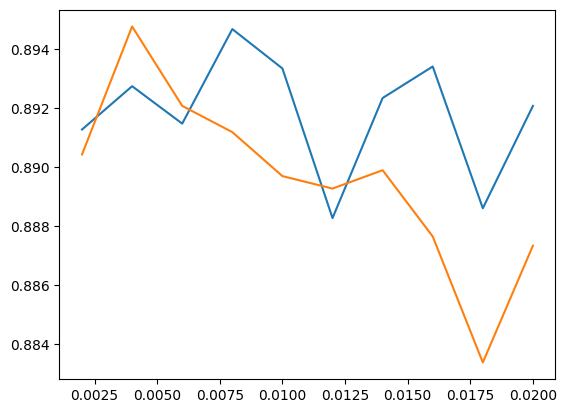

In [168]:
learn = np.loadtxt('VarHyper/lr.txt', delimiter=',')
plt.plot(learn[:, 2], learn[:, 0], learn[:, 2], learn[:, 1])
plt.show()

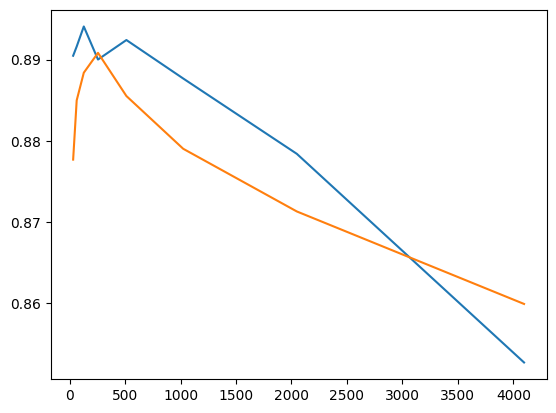

In [169]:
learn = np.loadtxt('VarHyper/batchsize.txt', delimiter=',')
plt.plot(learn[:, 2], learn[:, 0], learn[:, 2], learn[:, 1])
plt.show()